# Chemical segregation using logistic regression

Importing libraries



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

Data Preparation

In [0]:

dfx=pd.read_csv('/content/Logistic_X_Train.csv')
dfy=pd.read_csv('/content/Logistic_Y_Train.csv')


In [0]:
X1=dfx["f1"].values
X2=dfx["f2"].values
X3=dfx["f3"].values
Y=dfy.values


In [0]:
x1=X1.reshape((-1,))
x2=X2.reshape((-1,))
x3=X3.reshape((-1,))
y=Y.reshape((-1,))


# Logistic regression




Hypothesis

In [0]:
def hypothesis(x1,x2,x3,theta):
  hx=theta[0]+theta[1]*x1+theta[2]*x2+theta[3]*x3;
  return sigmoid(hx)

Sigmoid function

In [0]:
def sigmoid(h):
  return 1.0/(1.0+np.exp(-1.0*h))

Error function

In [0]:
def error(x1,x2,x3,y,theta):
  e=0
  for i in range(x1.shape[0]):
    hx=hypothesis(x1[i],x2[i],x3[i],theta)
    e+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
  return e  

Finding Gradient

In [0]:
def get_grad(x1,x2,x3,y,theta):
  grad =np.zeros((4,))
  for i in range(x1.shape[0]):
    hx=hypothesis(x1[i],x2[i],x3[i],theta)
    grad[0]+=(y[i]-hx)
    grad[1]+=(y[i]-hx)*x1[i]
    grad[2]+=(y[i]-hx)*x2[i]
    grad[3]+=(y[i]-hx)*x3[i]
  return grad  

Gradient descent(actually ascent)

In [0]:
def gradient_ascent(x1,x2,x3,y,learning_rate=0.001):
  theta=[0.0,0.0,0.0,0.0]
  err_list=[]
  itr=0
  while itr<1000:
    grad=get_grad(x1,x2,x3,y,theta)
    hx=hypothesis(x1,x2,x3,theta)
    e=error(x1,x2,x3,y,theta)
    err_list.append(e)
    theta[0] += learning_rate*grad[0]
    theta[1] += learning_rate*grad[1]
    theta[2] += learning_rate*grad[2]
    theta[3] += learning_rate*grad[3]   
    itr +=1
  return theta,err_list   


[-4.882785250498418, -4.407238476242473, 3.5772025763307314, -2.375702893105707]


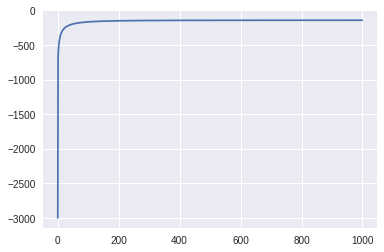

In [15]:
final_theta,error_list = gradient_ascent(x1,x2,x3,y)
print(final_theta)
plt.plot(error_list)
plt.show()

*Prediction

In [0]:
def predict(x1,x2,x3,theta):
  test_Y=[]
  for i in range(x1.shape[0]):
    hx=hypothesis(x1[i],x2[i],x3[i],theta)
    l=-1
    if hx >= 0.5:
      l=1
    elif hx <0.5:
      l=0
    test_Y.append(l)
  return test_Y      

In [18]:
test_data=pd.read_csv("/content/Logistic_X_Test.csv")
x11=test_data["f1"].values
x22=test_data["f2"].values
x33=test_data["f3"].values
X11=x11.reshape((-1,))
X22=x22.reshape((-1,))
X33=x33.reshape((-1,))
prediction=predict(X11,X22,X33,final_theta)
print(prediction)


[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 